# Exploring the Pooper Scooper Law: NYC Parks Open Data

In this notebook, we will investigate whether the installation of 1,000 waste bag dispensers in NYC parks was effective in reducing the frequency of animal waste left behind.

Our first step is to install necessary libraries. Pandas will be used for data analysis and storing the data in tabular format and Matplotlib will be used to produce charts that help us visualize the data.

In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt


Next, we will read in the csv file containing the Park Cleaning records. The dataset can be downloaded from [the NYC Open Data Portal](https://data.cityofnewyork.us/City-Government/Daily-Tasks-Park-Cleaning-Records/kwte-dppd). We will also set the view for our pandas dataframes as displaying all columns so we can see each column of our data.

In [2]:
df = pd.read_csv('Daily_Tasks_Park_Cleaning_Records.csv')

In [3]:
pd.set_option('display.max_columns', None)

Let's start by looking at one specific route taken on a given day. To find one specific route, we can use the vehicle column.

In [7]:
jan20 = df[df['date_worked']=='01/20/2016']
car = jan20[jan20['vehicle_number']==7079.0]
car

,row_id,gispropnum,omppropid,gisobjid,route_id,off_route,description,district,sector,sector_name,sector_desc,vehicle_number,date_worked,start_time,end_time,activity,animal_waste,broken_glass,dumping,graffiti,medical_waste,napsw,ncpw,ncsa,npop,nnpw,ncrew,fixed_post,nhours,daily_task_id,daily_task_activity_id,overlap_flag,fiscal_day,fiscal_week,fiscal_qtr
1300494,3307314,X028,X028,100005035.0,219.0,No,X028 | Joyce Kilmer Park,X-04,X-SA,Bronx Sector A,"Districts 1, 4, 5",7079.0,01/20/2016,01/20/2016 09:35:00 AM,01/20/2016 10:30:00 AM,Work,Yes,Yes,No,No,No,0.0,1.0,0.0,2.0,0.0,3.0,No,0.92,72156,311525,1,203,29,2016Q3
1629284,3279646,X348-01,X348-01,100008272.0,219.0,No,X348-01 | River Avenue Playground,X-04,X-SA,Bronx Sector A,"Districts 1, 4, 5",7079.0,01/20/2016,01/20/2016 10:45:00 AM,01/20/2016 12:00:00 PM,Work,Yes,Yes,No,No,No,0.0,1.0,0.0,2.0,0.0,3.0,No,0.58,72156,311522,1,203,29,2016Q3
1648932,1332830,NaN,NaN,NaN,219.0,NaN,NaN,NaN,X-SA,Bronx Sector A,"Districts 1, 4, 5",7079.0,01/20/2016,01/20/2016 03:00:00 PM,01/20/2016 03:30:00 PM,De-Mobilization,No,No,No,No,No,0.0,1.0,0.0,2.0,0.0,3.0,No,0.50,72156,311526,0,203,29,2016Q3
1784719,4114599,X030,X030-ZN03,100008261.0,219.0,No,X030-ZN03 | Macombs Dam Park Zone 3,X-04,X-SA,Bronx Sector A,"Districts 1, 4, 5",7079.0,01/20/2016,01/20/2016 12:40:00 PM,01/20/2016 02:50:00 PM,Work,Yes,Yes,No,No,No,0.0,1.0,0.0,2.0,0.0,3.0,No,1.08,72156,311518,1,203,29,2016Q3
1864790,4109239,X030,X030-ZN01,100008260.0,219.0,No,X030-ZN01 | Macombs Dam Park Zone 1 Upper,X-04,X-SA,Bronx Sector A,"Districts 1, 4, 5",7079.0,01/20/2016,01/20/2016 07:45:00 AM,01/20/2016 09:25:00 AM,Work,Yes,Yes,No,No,No,0.0,1.0,0.0,2.0,0.0,3.0,No,0.83,72156,311515,1,203,29,2016Q3
2178567,3983460,X030,X030-02,100008262.0,219.0,No,X030-02 | Heritage Field Playground,X-04,X-SA,Bronx Sector A,"Districts 1, 4, 5",7079.0,01/20/2016,01/20/2016 11:45:00 AM,01/20/2016 12:00:00 PM,Work,Yes,Yes,No,No,No,0.0,1.0,0.0,2.0,0.0,3.0,No,0.08,72156,311520,1,203,29,2016Q3
2579335,4565288,X030-XZ366,X030-XZ366,100006716.0,219.0,No,X030-XZ366 | Macombs Dam Park-Greenstreet,X-04,X-SA,Bronx Sector A,"Districts 1, 4, 5",7079.0,01/20/2016,01/20/2016 07:45:00 AM,01/20/2016 09:25:00 AM,Work,Yes,Yes,No,No,No,0.0,1.0,0.0,2.0,0.0,3.0,No,0.83,72156,311515,1,203,29,2016Q3
3973469,3983459,X030,X030-ZN02,100008259.0,219.0,No,X030-ZN02 | Macombs Dam Park Zone 2 Lower,X-04,X-SA,Bronx Sector A,"Districts 1, 4, 5",7079.0,01/20/2016,01/20/2016 12:40:00 PM,01/20/2016 02:50:00 PM,Work,Yes,Yes,No,No,No,0.0,1.0,0.0,2.0,0.0,3.0,No,1.08,72156,311518,1,203,29,2016Q3
4460698,1332825,NaN,NaN,NaN,219.0,NaN,NaN,NaN,X-SA,Bronx Sector A,"Districts 1, 4, 5",7079.0,01/20/2016,01/20/2016 07:00:00 AM,01/20/2016 07:30:00 AM,Mobilization,No,No,No,No,No,0.0,1.0,0.0,2.0,0.0,3.0,No,0.50,72156,311512,0,203,29,2016Q3
4484320,3279645,X348,X348-02,100008271.0,219.0,No,X348-02 | River Avenue Skate Park,X-04,X-SA,Bronx Sector A,"Districts 1, 4, 5",7079.0,01/20/2016,01/20/2016 10:45:00 AM,01/20/2016 12:00:00 PM,Work,Yes,Yes,No,No,No,0.0,1.0,0.0,2.0,0.0,3.0,No,0.58,72156,311522,1,203,29,2016Q3


Oh wow...at first glance, one can already tell that some of the times are double-counted. For instance,Macombs Dam park Zone 2 and 3 are recorded as separated instances, but were cleaned at the exact same time. The same double counting occurs for River Avenue Skate Park and River Avenue Playground. I would be curious to know whether this is taken into account when reporting the number of hours of work each park receives in the Parks Department's annual report. 

To mitigate this double-counting, when counting the number of hours for a park on a given day, we could check whether the start and end timestamps are equal. However, since the number of hours is not relevant for our question, we can move on. Since we are relying on the counts of animal waste encountered, we would need to have a conversation with the Parks department to understand how this data is recorded. Perhaps, the cleaning crew split up to work on the respective properties and animal waste was encountered on both properties.



Next, let's write our function to count the occurrences of animal waste. Since our data set contains over 4.5 million lines, this will probably take a couple of minutes so let's also collect the occurrences of graffiti and broken glass as well as sum the number of hours in case we want to use this information later.

This function iterates through each row of data and counts the number of "Yes" values for animal waste, graffiti, and broken glass as well as sums the number of hours.

In [5]:
def countActivity(df):
    animalWaste=0
    glass=0
    graffiti = 0
    nhours = 0
    for i in df.iterrows():
        nhours += i[1][28]
        if i[1][16]=="Yes":
            animalWaste+=1
        if i[1][17]=="Yes":
            glass += 1
        if i[1][19]=='Yes':
            graffiti += 1
    return animalWaste, glass, graffiti, nhours
        

Oops! Before we run our function, we need to convert the 'date worked' column into a datetime object so we can sort our data by the date it occurred and use it as an index in case we produce a chart.

In [5]:
df['date_worked'] = pd.to_datetime(df['date_worked'], format='%m/%d/%Y')

Let's see if it worked by looking at the data types of all our columns. It looks like date_worked is now a datetime object so mission accomplished!

In [6]:
df.dtypes

row_id                             int64
gispropnum                        object
omppropid                         object
gisobjid                         float64
route_id                         float64
off_route                         object
description                       object
district                          object
sector                            object
sector_name                       object
sector_desc                       object
vehicle_number                   float64
date_worked               datetime64[ns]
start_time                        object
end_time                          object
activity                          object
animal_waste                      object
broken_glass                      object
dumping                           object
graffiti                          object
medical_waste                     object
napsw                            float64
ncpw                             float64
ncsa                             float64
npop            

For each date, we will run the countActivity function and append the respective counts to an overall list so that we can easily create a dictionary to create a new dataframe with the counts for each date.

In [7]:
dates=df['date_worked'].unique()
animalWasteAll=[]
glassAll=[]
graffitiAll=[]
hoursAll=[]
for i in dates:
    temp = df[(df['date_worked']==i)]
    animalWaste, glass, graffiti,hours = countActivity(temp)
    animalWasteAll.append(animalWaste)
    glassAll.append(glass)
    graffitiAll.append(graffiti)
    hoursAll.append(hours)

In [8]:
dfAll=pd.DataFrame({'animal_waste': animalWasteAll, 'broken_glass': glassAll, 'graffiti': graffitiAll, 'date': dates})

In [30]:
dfAll.dtypes

animal_waste     int64
broken_glass     int64
graffiti         int64
date            object
dtype: object

It looks like our date column lost its datetime data type since it was created from a list. Let's quickly convert it to a datetime object.

In [9]:
dfAll['date'] = pd.to_datetime(dfAll["date"])

df_sorted = dfAll.sort_values(by='date')

In [32]:
df_sorted.head(10)

,animal_waste,broken_glass,graffiti,date
1355,74,100,11,2015-09-03
989,134,178,15,2015-09-04
1482,277,345,41,2015-09-05
1040,301,390,35,2015-09-06
1107,338,365,42,2015-09-07
116,308,362,30,2015-09-08
565,334,374,55,2015-09-09
1258,363,416,26,2015-09-10
1084,346,362,34,2015-09-11
561,348,371,45,2015-09-12


Now we are ready to construct a time series to see whether or not the number of occurrences of animal waste decreased after August 1, 2018 (when the waste bag dispensers were installed).

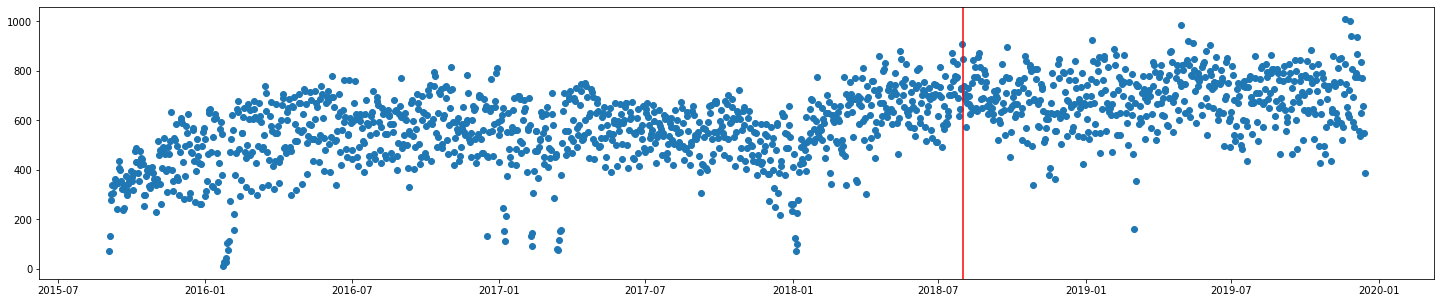

In [36]:
plt.figure(figsize=(25,5))
plt.scatter(df_sorted['date'],df_sorted['animal_waste'])
plt.axvline('2018-08-01', color='red')

Hmmm, there doesn't appear to be a significant difference. Perhaps we can look at the averages to get a "cleaner" look at the data.

In [18]:
df_sorted['month']=df_sorted['date'].dt.month
df_sorted['year']=df_sorted['date'].dt.year
df_sorted['monthYear']= df_sorted['month'].astype(str) + '/'+ df_sorted['year'].astype(str)
df_avg = df_sorted.groupby('monthYear').mean()
df_avg.reset_index()
df_avg['monthYear']=df_avg.index
df_avg['monthYear']=pd.to_datetime(df_avg['monthYear'], format='%m/%Y')

df_avg

,animal_waste,broken_glass,graffiti,month,year,monthYear
monthYear,,,,,,
1/2016,361.451613,380.774194,59.000000,1.0,2016.0,2016-01-01
1/2017,513.806452,444.838710,76.677419,1.0,2017.0,2017-01-01
1/2018,460.354839,453.580645,73.741935,1.0,2018.0,2018-01-01
1/2019,697.354839,644.935484,49.548387,1.0,2019.0,2019-01-01
10/2015,380.064516,421.548387,45.548387,10.0,2015.0,2015-10-01
10/2016,622.580645,612.096774,97.096774,10.0,2016.0,2016-10-01
10/2017,581.419355,586.032258,104.354839,10.0,2017.0,2017-10-01
10/2018,686.838710,667.451613,66.612903,10.0,2018.0,2018-10-01
10/2019,692.354839,686.161290,117.483871,10.0,2019.0,2019-10-01


Here, we have created a new column with the month and year and converted it into a datetime object so we can use it as an index to construct our time series. Now let's construct a time series using the average number of occurrences of animal waste left behind per month. It's important to look at the monthly or a quarterly summary rather than just the average before and after to take into account seasonal fluctuations in the average.

/share/apps/jupyterhub/2019-FA-DS-GA-3001/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


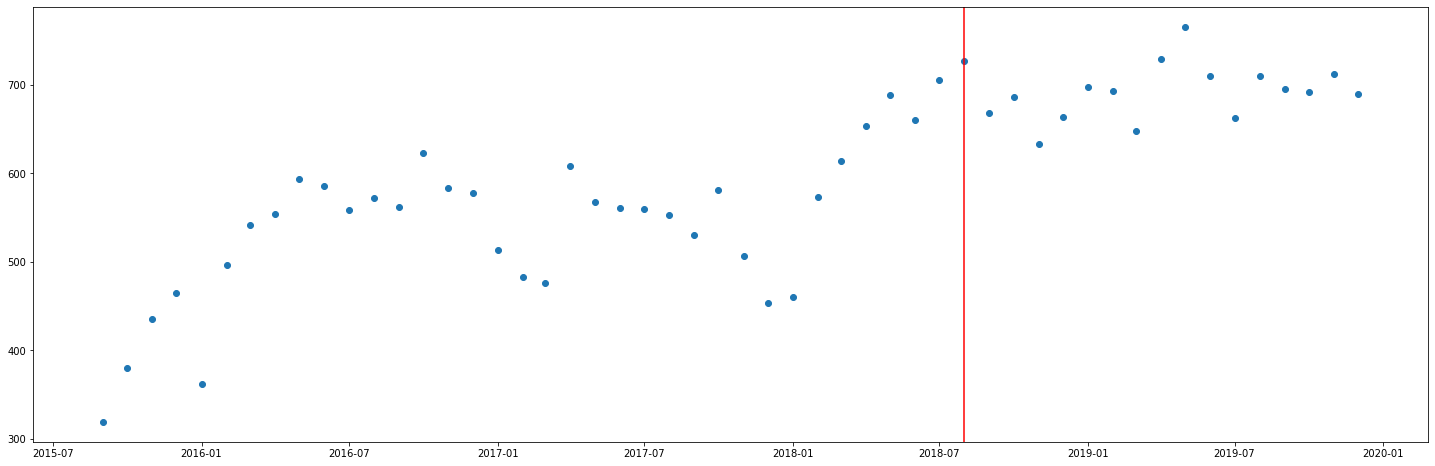

In [19]:
plt.figure(figsize=(25,8))
plt.scatter(df_avg['monthYear'],df_avg['animal_waste'])
plt.axvline('2018-08-01', color='red')

Let's also make sure to save all this work into a dataframe!  That way if there's a loss of internet connection or we want to come back later to work on the data, we don't need to run everything again. We can save the dataframe as a pickle which is a format that allows us to easily save a python object. The string passed into the to_pickle function is the path and file name of the pickle object. To read the object back into a dataframe we can use the pandas read_pickle method.

In [10]:
df_sorted.to_pickle('allYear.pkl')

In [15]:
df_sorted=pd.read_pickle('allYear.pkl')

# Other Experiments

In [11]:
df_sorted.reset_index()

,index,animal_waste,broken_glass,graffiti,date
0,1355,74,100,11,2015-09-03
1,989,134,178,15,2015-09-04
2,1482,277,345,41,2015-09-05
3,1040,301,390,35,2015-09-06
4,1107,338,365,42,2015-09-07
5,116,308,362,30,2015-09-08
6,565,334,374,55,2015-09-09
7,1258,363,416,26,2015-09-10
8,1084,346,362,34,2015-09-11
9,561,348,371,45,2015-09-12


# Analyzing the count of animal waste left behind by day of the week:

In [3]:
sat = pd.DatetimeIndex(df_sorted['date']).dayofweek==5
sun = pd.DatetimeIndex(df_sorted['date']).dayofweek==6
mon = pd.DatetimeIndex(df_sorted['date']).dayofweek==0
tues = pd.DatetimeIndex(df_sorted['date']).dayofweek==1
wed = pd.DatetimeIndex(df_sorted['date']).dayofweek==2
thurs = pd.DatetimeIndex(df_sorted['date']).dayofweek==3
fri = pd.DatetimeIndex(df_sorted['date']).dayofweek==4

In [7]:
day_of_week=[]

day_of_week.append(df_sorted[sun]['animal_waste'].sum())
day_of_week.append(df_sorted[mon]['animal_waste'].sum())
day_of_week.append(df_sorted[tues]['animal_waste'].sum())
day_of_week.append(df_sorted[wed]['animal_waste'].sum())
day_of_week.append(df_sorted[thurs]['animal_waste'].sum())
day_of_week.append(df_sorted[fri]['animal_waste'].sum())
day_of_week.append(df_sorted[sat]['animal_waste'].sum())
days=['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [21]:
bar_chart=pd.DataFrame({'Days': days, 'Occurrences': day_of_week})

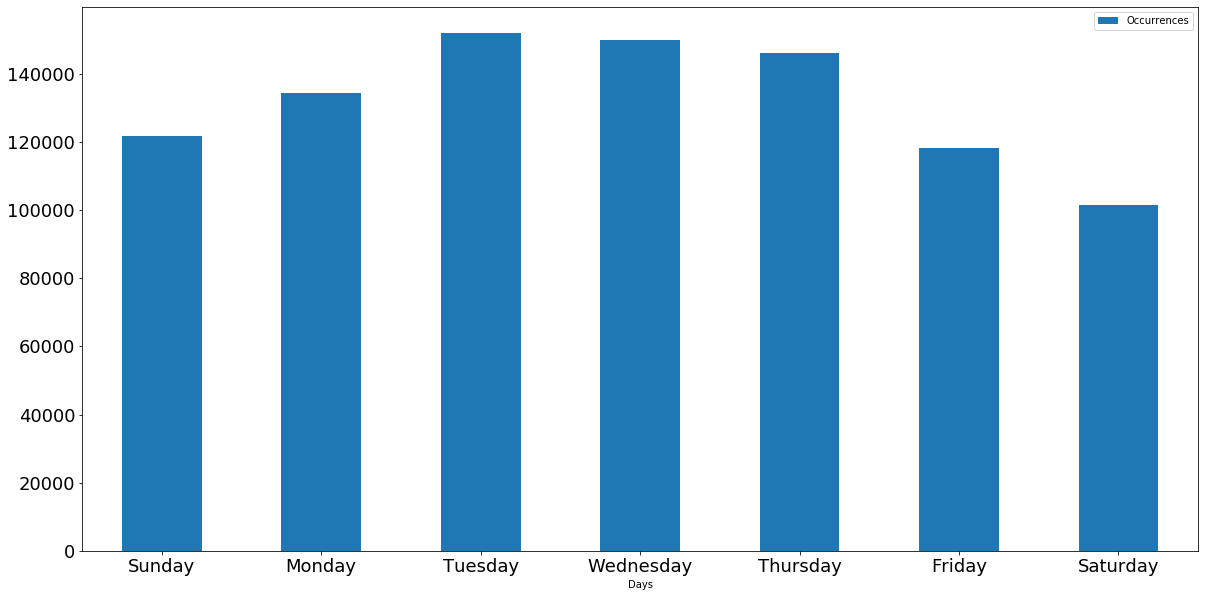

In [28]:

ax = bar_chart.plot.bar(x='Days', y='Occurrences', rot=0, figsize=(20,10),fontsize=18)

# Exploring other ways to visualize day of the week:

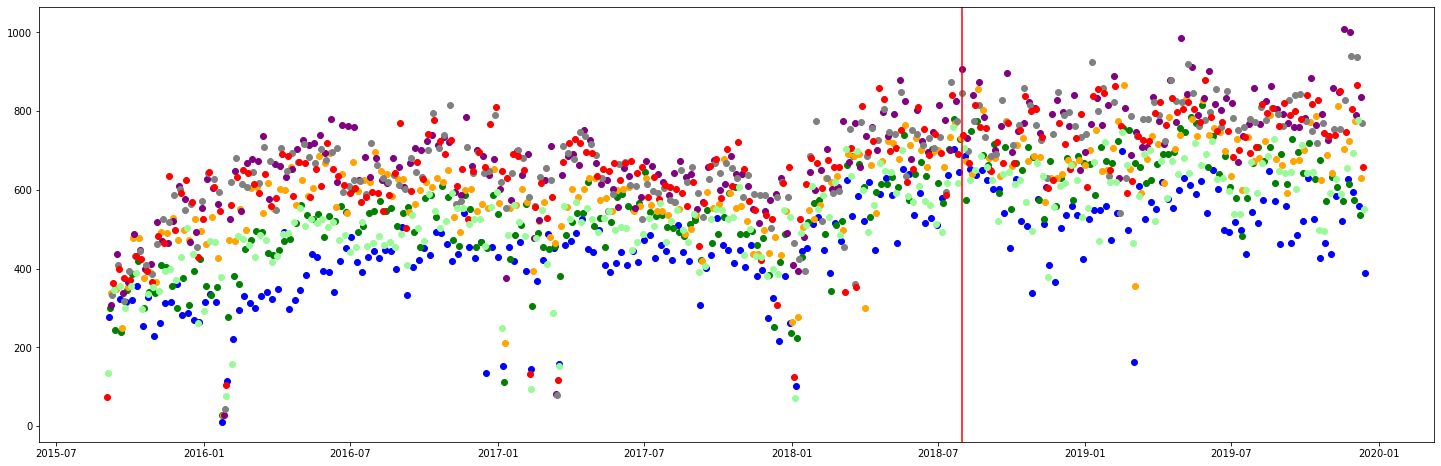

In [33]:
df_sorted.set_index('date')
plt.figure(figsize=(25,8))
plt.scatter(df_sorted[sat]['date'],df_sorted[sat]['animal_waste'], color='blue')
plt.scatter(df_sorted[sun]['date'],df_sorted[sun]['animal_waste'], color='green')
plt.scatter(df_sorted[mon]['date'],df_sorted[mon]['animal_waste'], color='orange')
plt.scatter(df_sorted[tues]['date'],df_sorted[tues]['animal_waste'], color='purple')
plt.scatter(df_sorted[wed]['date'],df_sorted[wed]['animal_waste'], color='gray')
plt.scatter(df_sorted[thurs]['date'],df_sorted[thurs]['animal_waste'], color='red')
plt.scatter(df_sorted[fri]['date'],df_sorted[fri]['animal_waste'], color='palegreen')

plt.axvline('2018-08-01', color='red')

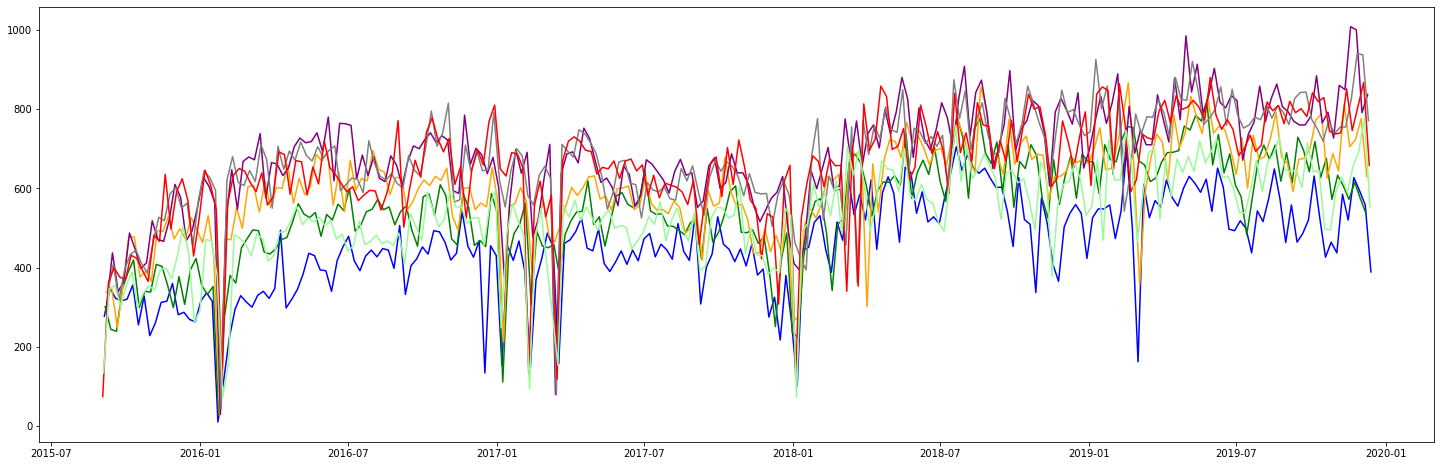

In [36]:
plt.figure(figsize=(25,8))

plt.plot(df_sorted[sat]['date'],df_sorted[sat]['animal_waste'], color='blue')
plt.plot(df_sorted[sun]['date'],df_sorted[sun]['animal_waste'], color='green')
plt.plot(df_sorted[mon]['date'],df_sorted[mon]['animal_waste'], color='orange')
plt.plot(df_sorted[tues]['date'],df_sorted[tues]['animal_waste'], color='purple')
plt.plot(df_sorted[wed]['date'],df_sorted[wed]['animal_waste'], color='gray')
plt.plot(df_sorted[thurs]['date'],df_sorted[thurs]['animal_waste'], color='red')
plt.plot(df_sorted[fri]['date'],df_sorted[fri]['animal_waste'], color='palegreen')

# Exploring broken glass by day of the week:

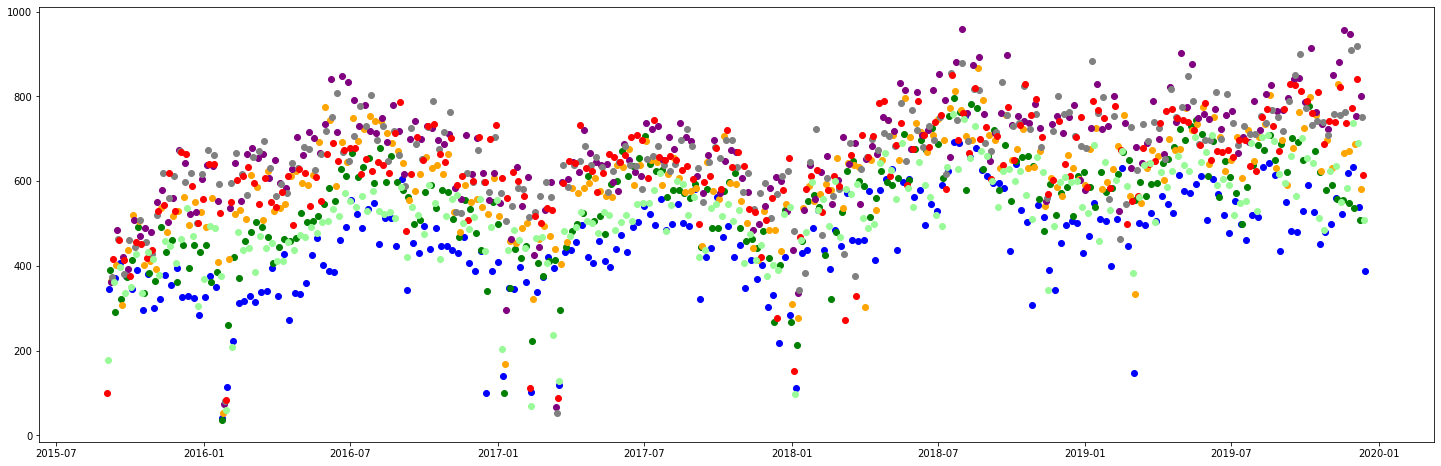

In [37]:
plt.figure(figsize=(25,8))
plt.scatter(df_sorted[sat]['date'],df_sorted[sat]['broken_glass'], color='blue')
plt.scatter(df_sorted[sun]['date'],df_sorted[sun]['broken_glass'], color='green')
plt.scatter(df_sorted[mon]['date'],df_sorted[mon]['broken_glass'], color='orange')
plt.scatter(df_sorted[tues]['date'],df_sorted[tues]['broken_glass'], color='purple')
plt.scatter(df_sorted[wed]['date'],df_sorted[wed]['broken_glass'], color='gray')
plt.scatter(df_sorted[thurs]['date'],df_sorted[thurs]['broken_glass'], color='red')
plt.scatter(df_sorted[fri]['date'],df_sorted[fri]['broken_glass'], color='palegreen')

# Exploring graffiti by day of the week:  
(interesting how there's a sudden increase in frequncy of graffiti occurred. Can't seem to find any news/other articles about this, but might be interesting to explore further.)

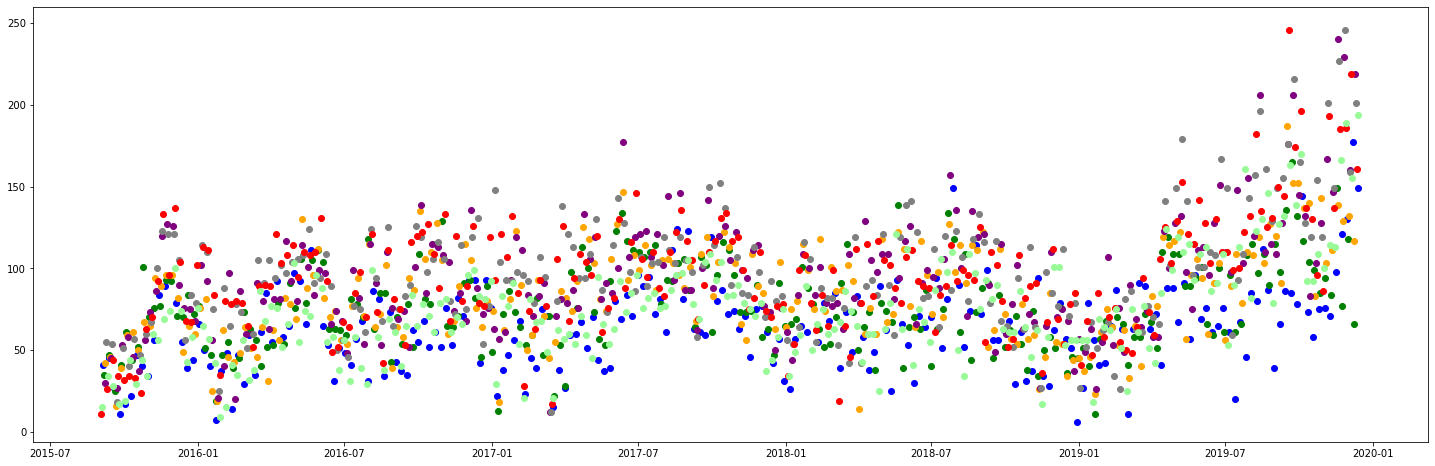

In [40]:
plt.figure(figsize=(25,8))
plt.scatter(df_sorted[sat]['date'],df_sorted[sat]['graffiti'], color='blue')
plt.scatter(df_sorted[sun]['date'],df_sorted[sun]['graffiti'], color='green')
plt.scatter(df_sorted[mon]['date'],df_sorted[mon]['graffiti'], color='orange')
plt.scatter(df_sorted[tues]['date'],df_sorted[tues]['graffiti'], color='purple')
plt.scatter(df_sorted[wed]['date'],df_sorted[wed]['graffiti'], color='gray')
plt.scatter(df_sorted[thurs]['date'],df_sorted[thurs]['graffiti'], color='red')
plt.scatter(df_sorted[fri]['date'],df_sorted[fri]['graffiti'], color='palegreen')


# Exploring Quarterly Summary by Borough

In [3]:
sectors = df['sector_name'].unique()
quarters = df['fiscal_qtr'].unique()

In [14]:
animalWasteBorough=[]
glassBorough=[]
graffitiBorough=[]
hoursBorough = []
index=[]
for i in sectors:
    for j in quarters:
        temp = df[(df['sector_name']==i) & (df['fiscal_qtr']==j)]
        animalWaste, glass, graffiti, hours = countActivity(temp)
        animalWasteBorough.append(animalWaste)
        glassBorough.append(glass)
        graffitiBorough.append(graffiti)
        hoursBorough.append(hours)
        index.append([i,j])
    

In [19]:
dfBorough=pd.DataFrame({'animal_waste': animalWasteBorough, 'broken_glass': glassBorough, 'graffiti': graffitiBorough, 'sector': index, 'hours': hoursBorough})

In [40]:
dfBorough.to_pickle('borough.pkl')

In [41]:
dfBorough

,animal_waste,broken_glass,graffiti,sector,hours,quarter,borough
0,4257,3458,120,"[Bronx Sector 3.6, 2019Q3]",6422.75,2019Q3,Bronx
1,4172,3444,298,"[Bronx Sector 3.6, 2019Q2]",6091.10,2019Q2,Bronx
2,5439,5058,192,"[Bronx Sector 3.6, 2020Q2]",9258.39,2020Q2,Bronx
3,5323,5297,457,"[Bronx Sector 3.6, 2018Q3]",5637.26,2018Q3,Bronx
4,5403,4009,178,"[Bronx Sector 3.6, 2019Q4]",7653.64,2019Q4,Bronx
5,5898,5582,680,"[Bronx Sector 3.6, 2018Q4]",8121.96,2018Q4,Bronx
6,5142,3825,182,"[Bronx Sector 3.6, 2020Q1]",9207.08,2020Q1,Bronx
7,4346,4335,385,"[Bronx Sector 3.6, 2019Q1]",8523.05,2019Q1,Bronx
8,0,0,0,"[Bronx Sector 3.6, 2017Q4]",0.00,2017Q4,Bronx
9,0,0,0,"[Bronx Sector 3.6, 2016Q1]",0.00,2016Q1,Bronx


In [43]:
temp_sort = dfBorough.sort_values(by='quarter')

In [2]:
dfBorough = pd.read_pickle('borough.pkl')

In [15]:
dfBorough['quarter']=pd.to_datetime(dfBorough.quarter).dt.to_period('Q')
dfBorough['date']=pd.to_datetime(dfBorough['quarter'].dt)

TypeError: Passing PeriodDtype data is invalid.  Use `data.to_timestamp()` instead

In [19]:
dfBorough['date']=dfBorough['quarter'].dt.to_timestamp()

In [32]:
quarterList=[]
sectorList=[]
for i,row in dfBorough.iterrows():
    quarterList.append(dfBorough['sector'].values[i][1])
    sectorList.append(dfBorough['sector'].values[i][0])

In [29]:
dfBorough['quarter']=quarterList

In [37]:
#creating new attribute of borough name using the sector names
boroughList = []
for s in sectorList:
    temp=str(s).split(' ',1)[0]
    if temp=='Staten':
        boroughList.append('Staten Island')
    else:
        boroughList.append(temp)

In [39]:
dfBorough['borough']=boroughList

In [25]:
#creating new dataframes with the count by quarter for each borough
manhattan = dfBorough[dfBorough['borough']=='Manhattan']
manhattan=manhattan.groupby('date').sum()
queens = dfBorough[dfBorough['borough']=='Queens']
queens=queens.groupby('date').sum()
staten = dfBorough[dfBorough['borough']=='Staten Island']
staten=staten.groupby('date').sum()
brooklyn = dfBorough[dfBorough['borough']=='Brooklyn']
brooklyn=brooklyn.groupby('date').sum()
bronx = dfBorough[dfBorough['borough']=='Bronx']
bronx=bronx.groupby('date').sum()

In [23]:
manhattan

,animal_waste,broken_glass,graffiti,hours
date,,,,
2016-01-01,2386,2343,589,18872.42
2016-04-01,8860,8474,2101,60948.26
2016-07-01,11083,9198,1854,54720.15
2016-10-01,10053,9051,1936,56685.59
2017-01-01,8764,8502,963,63534.94
2017-04-01,11921,10166,1625,63262.40
2017-07-01,11973,9462,1954,56940.31
2017-10-01,11498,10501,1518,62429.55
2018-01-01,9846,9471,1445,65082.27


# plotting quarter summary of animal waste cleanup by borough

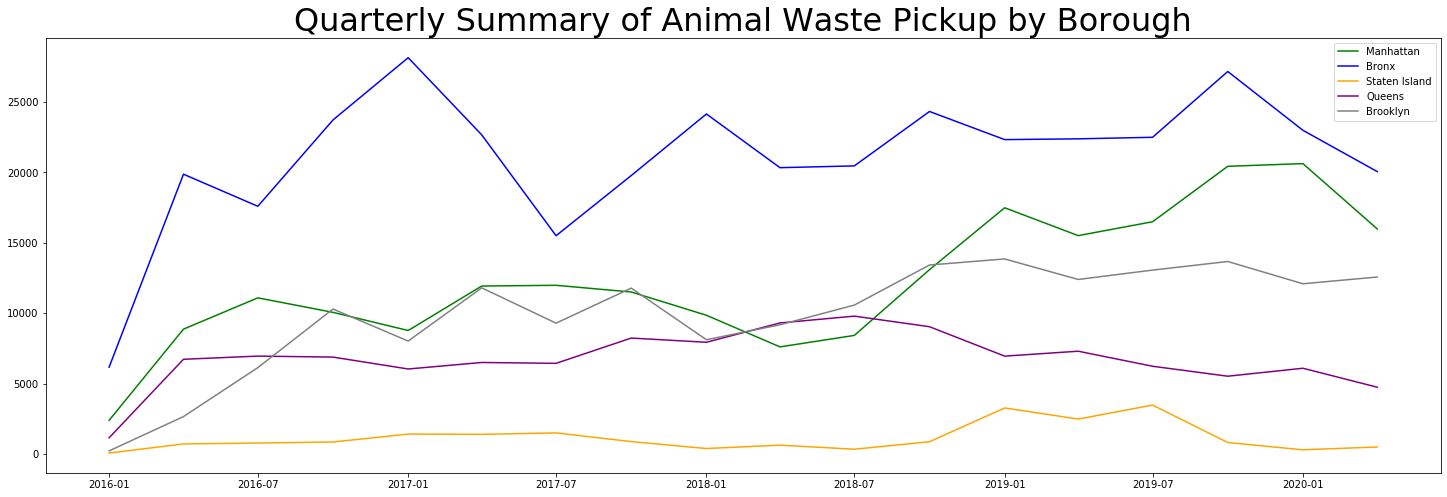

In [32]:
plt.figure(figsize=(25,8))
plt.rcParams['axes.titlesize'] = 32

plt.plot(manhattan.index,manhattan['animal_waste'], color='green', label="Manhattan")
plt.plot(bronx.index,bronx['animal_waste'], color='blue', label="Bronx")
plt.plot(staten.index,staten['animal_waste'], color='orange', label="Staten Island")
plt.plot(queens.index,queens['animal_waste'], color='purple', label="Queens")
plt.plot(brooklyn.index,brooklyn['animal_waste'], color='gray', label="Brooklyn")
plt.legend()
plt.title('Quarterly Summary of Animal Waste Pickup by Borough')
plt.savefig('animalwastebyborough.jpg')

# plotting quarter summary of graffiti cleanup by borough

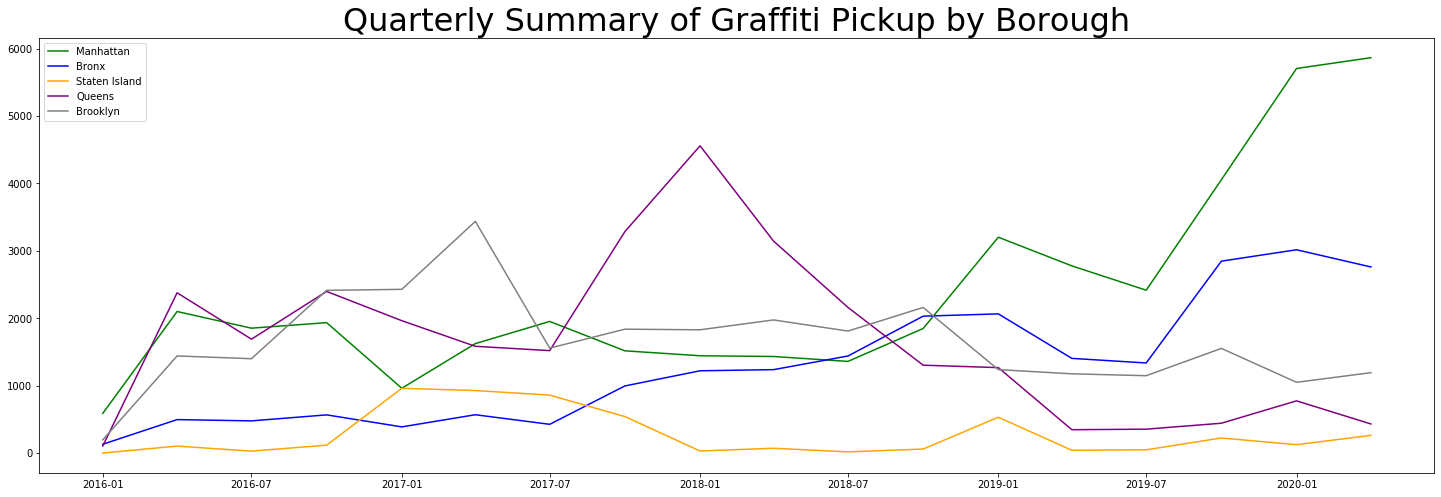

In [33]:
plt.figure(figsize=(25,8))
plt.rcParams['axes.titlesize'] = 32

plt.plot(manhattan.index,manhattan['graffiti'], color='green', label="Manhattan")
plt.plot(bronx.index,bronx['graffiti'], color='blue', label="Bronx")
plt.plot(staten.index,staten['graffiti'], color='orange', label="Staten Island")
plt.plot(queens.index,queens['graffiti'], color='purple', label="Queens")
plt.plot(brooklyn.index,brooklyn['graffiti'], color='gray', label="Brooklyn")
plt.legend()
plt.title('Quarterly Summary of Graffiti Pickup by Borough')
plt.savefig('graffitibyborough.jpg')

# plotting quarter summary of broken glass cleanup by borough

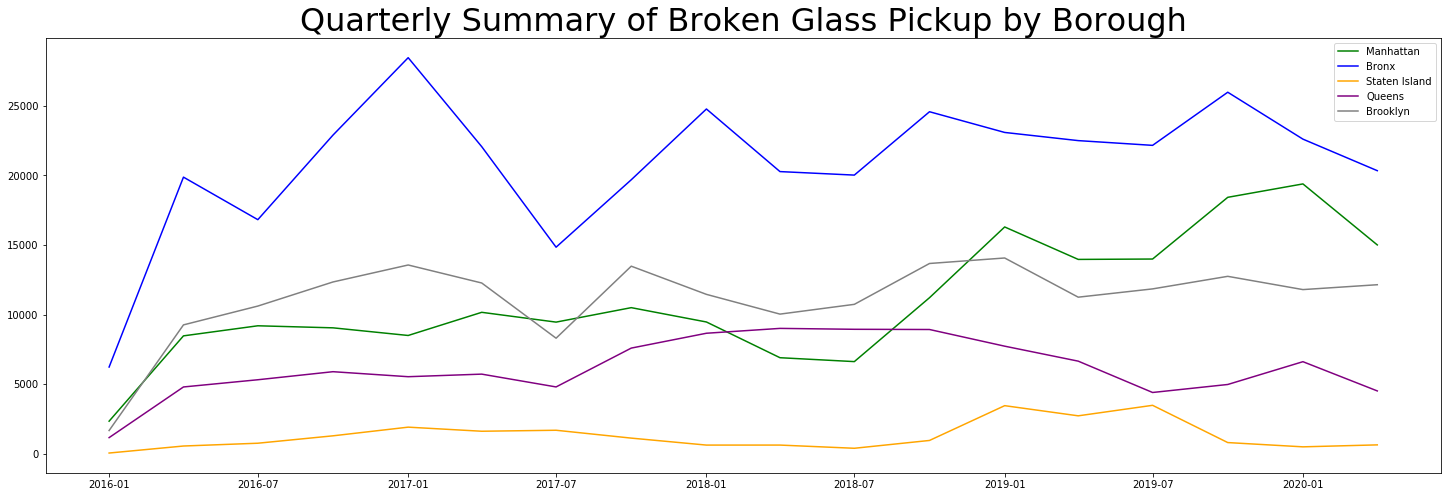

In [34]:
plt.figure(figsize=(25,8))
plt.rcParams['axes.titlesize'] = 32

plt.plot(manhattan.index,manhattan['broken_glass'], color='green', label="Manhattan")
plt.plot(bronx.index,bronx['broken_glass'], color='blue', label="Bronx")
plt.plot(staten.index,staten['broken_glass'], color='orange', label="Staten Island")
plt.plot(queens.index,queens['broken_glass'], color='purple', label="Queens")
plt.plot(brooklyn.index,brooklyn['broken_glass'], color='gray', label="Brooklyn")
plt.legend()
plt.title('Quarterly Summary of Broken Glass Pickup by Borough')
plt.savefig('glassbyborough.jpg')